In [171]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt 
import seaborn as sns
import prophet
from prophet import Prophet 
from prophet.plot import plot_plotly, plot_components_plotly
from plotly import graph_objs as go 

In [172]:
df = pd.read_csv("./mock_kaggle.csv")
df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [173]:
df = df.rename(columns={'data': 'date', "venda": "sale", "estoque": "stock", "preco": "price"})
df.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [174]:
df.dropna(inplace= True)
df.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [175]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [176]:
df1 = df[["date", "price"]]
df1.head()

,date,price
0,2014-01-01,1.29
1,2014-01-02,1.29
2,2014-01-03,1.29
3,2014-01-04,1.29
4,2014-01-05,1.29


In [177]:
df1.columns = ["ds", "y"]
df1.head()

,ds,y
0,2014-01-01,1.29
1,2014-01-02,1.29
2,2014-01-03,1.29
3,2014-01-04,1.29
4,2014-01-05,1.29


In [178]:
df

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


In [179]:
df1["ds"].min()

Timestamp('2014-01-01 00:00:00')

In [180]:
df1["ds"].max()

Timestamp('2016-07-31 00:00:00')

<Axes: xlabel='ds'>

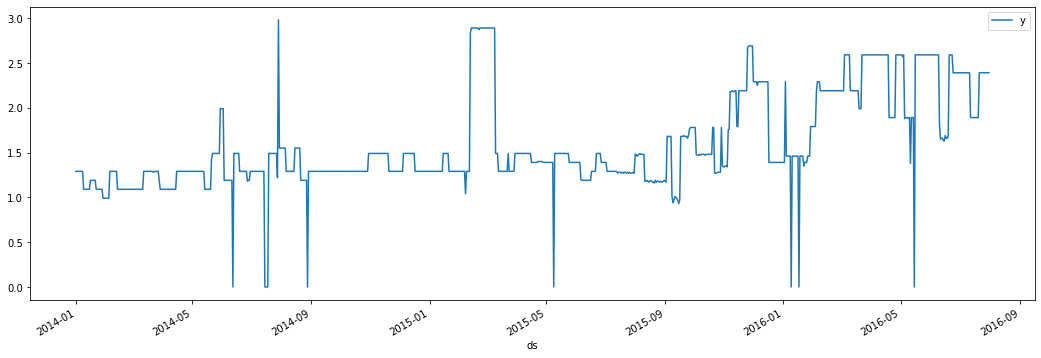

In [181]:
df1.plot(x = "ds", y = "y", figsize = (18, 6))

In [182]:
# Define the training date range
start_date = '2014-01-01'
end_date = '2016-12-30'
start_date1 = '2017-01-01'
end_date1 = '2017-12-30'

# Filter the DataFrame to select only the training and testing data
train = df1[(df1['ds'] >= start_date) & (df1['ds'] <= end_date)]
test = df1[(df1['ds'] >= start_date1) & (df1['ds'] <= end_date1)]

In [183]:
df1.shape

(937, 2)

In [184]:
train.shape

(937, 2)

In [185]:
test.shape

(0, 2)

In [186]:
# this code sets up and trains a Prophet model (m) on historical time series data (train), 
# generates a DataFrame (future) for future timestamps, 
# and then uses the trained model to make forecasts for those future timestamps
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 365) #MS - Monthly, H - Hourly
forecast = m.predict(future) 

00:12:29 - cmdstanpy - INFO - Chain [1] start processing
00:12:29 - cmdstanpy - INFO - Chain [1] done processing


In [187]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,1.083680,0.435057,1.302399,1.083680,1.083680,-0.212754,-0.212754,-0.212754,-0.006873,-0.006873,-0.006873,-0.205881,-0.205881,-0.205881,0.0,0.0,0.0,0.870926
1,2014-01-02,1.084867,0.423607,1.292956,1.084867,1.084867,-0.214986,-0.214986,-0.214986,-0.011240,-0.011240,-0.011240,-0.203746,-0.203746,-0.203746,0.0,0.0,0.0,0.869881
2,2014-01-03,1.086055,0.480541,1.314445,1.086055,1.086055,-0.197175,-0.197175,-0.197175,0.004273,0.004273,0.004273,-0.201447,-0.201447,-0.201447,0.0,0.0,0.0,0.888880
3,2014-01-04,1.087242,0.483787,1.296237,1.087242,1.087242,-0.211997,-0.211997,-0.211997,-0.012785,-0.012785,-0.012785,-0.199213,-0.199213,-0.199213,0.0,0.0,0.0,0.875245
4,2014-01-05,1.088430,0.473110,1.316990,1.088430,1.088430,-0.205320,-0.205320,-0.205320,-0.008071,-0.008071,-0.008071,-0.197248,-0.197248,-0.197248,0.0,0.0,0.0,0.883110


In [188]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1297,2017-07-27,3.464264,2.861868,3.787570,3.323783,3.598295,-0.130412,-0.130412,-0.130412,-0.011240,-0.011240,-0.011240,-0.119172,-0.119172,-0.119172,0.0,0.0,0.0,3.333851
1298,2017-07-28,3.467090,2.891762,3.839097,3.325943,3.601409,-0.096841,-0.096841,-0.096841,0.004273,0.004273,0.004273,-0.101114,-0.101114,-0.101114,0.0,0.0,0.0,3.370248
1299,2017-07-29,3.469916,2.932216,3.862578,3.328118,3.604908,-0.095607,-0.095607,-0.095607,-0.012785,-0.012785,-0.012785,-0.082822,-0.082822,-0.082822,0.0,0.0,0.0,3.374309
1300,2017-07-30,3.472742,2.924345,3.849572,3.330355,3.608577,-0.072782,-0.072782,-0.072782,-0.008071,-0.008071,-0.008071,-0.064711,-0.064711,-0.064711,0.0,0.0,0.0,3.399959
1301,2017-07-31,3.475568,2.990733,3.864765,3.332611,3.612246,-0.021439,-0.021439,-0.021439,0.025763,0.025763,0.025763,-0.047202,-0.047202,-0.047202,0.0,0.0,0.0,3.454128


In [189]:
test.tail()

,ds,y


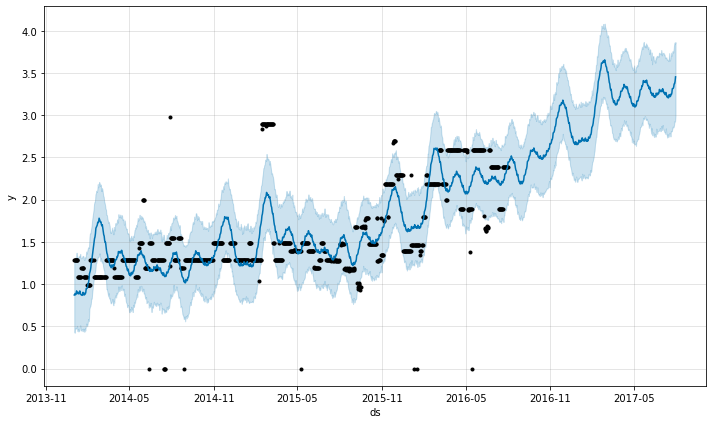

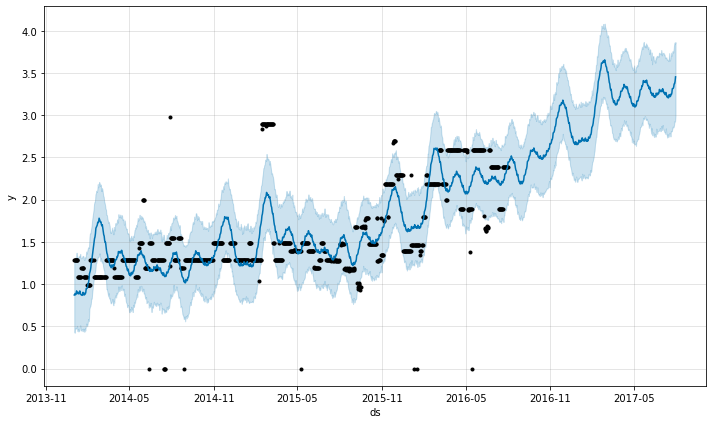

In [190]:
# plotting the forecasted data
m.plot(forecast)

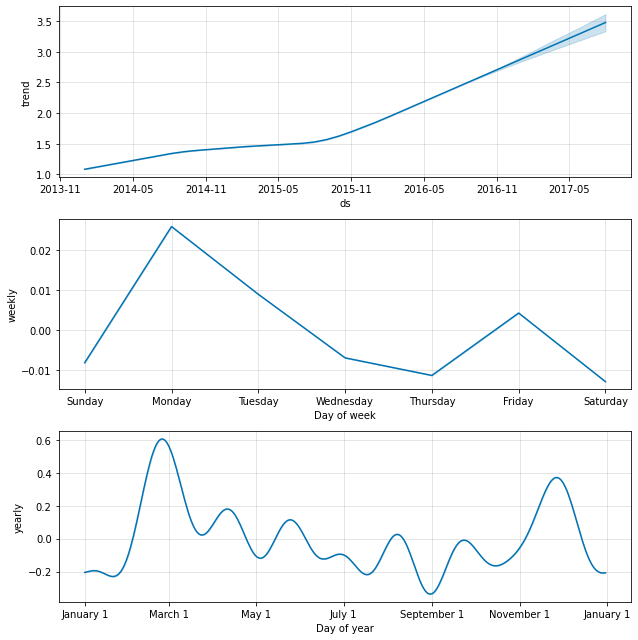

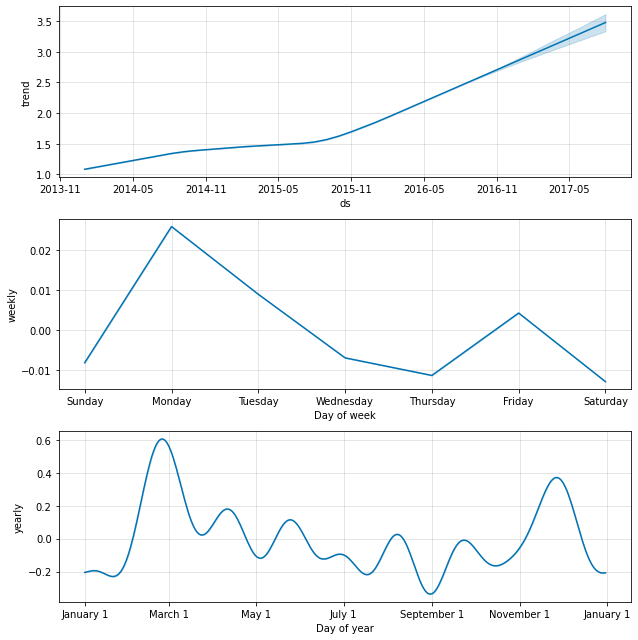

In [191]:
# this code is used to create a set of visualizations that display the individual components of the time series forecast
m.plot_components(forecast)

In [192]:
# performs cross-validation using the Prophet library for time series forecasting
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = "180 days")
df_cv 

  0%|          | 0/3 [00:00<?, ?it/s]00:12:35 - cmdstanpy - INFO - Chain [1] start processing
00:12:35 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.38it/s]00:12:36 - cmdstanpy - INFO - Chain [1] start processing
00:12:36 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.40it/s]00:12:36 - cmdstanpy - INFO - Chain [1] start processing
00:12:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-08-07,1.470187,1.122871,1.834293,1.48,2015-08-06
1,2015-08-08,1.461962,1.104648,1.818829,1.48,2015-08-06
2,2015-08-09,1.476768,1.146167,1.889692,1.48,2015-08-06
3,2015-08-10,1.469539,1.094252,1.852407,1.48,2015-08-06
4,2015-08-11,1.441767,1.079805,1.823375,1.18,2015-08-06
...,...,...,...,...,...,...
535,2016-07-27,1.702625,1.282591,2.090088,2.39,2016-02-02
536,2016-07-28,1.710788,1.299024,2.122083,2.39,2016-02-02
537,2016-07-29,1.751022,1.372013,2.179968,2.39,2016-02-02
538,2016-07-30,1.746388,1.316633,2.171787,2.39,2016-02-02


In [193]:
# compute performance metrics based on the results of cross-validation
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p 

,horizon,mse,rmse,mae,mdape,smape,coverage
0,18 days,0.215402,0.464115,0.349101,0.146634,0.199178,0.629630
1,19 days,0.226384,0.475798,0.360905,0.146634,0.205087,0.611111
2,20 days,0.234167,0.483908,0.367710,0.144086,0.208880,0.611111
3,21 days,0.252641,0.502634,0.376082,0.139427,0.213101,0.629630
4,22 days,0.273005,0.522498,0.384790,0.135402,0.217262,0.648148
...,...,...,...,...,...,...,...
158,176 days,0.620012,0.787409,0.723546,0.363400,0.478943,0.166667
159,177 days,0.638718,0.799198,0.733749,0.369849,0.486782,0.166667
160,178 days,0.654397,0.808948,0.742003,0.377061,0.492979,0.166667
161,179 days,0.677121,0.822874,0.757569,0.377061,0.501815,0.148148


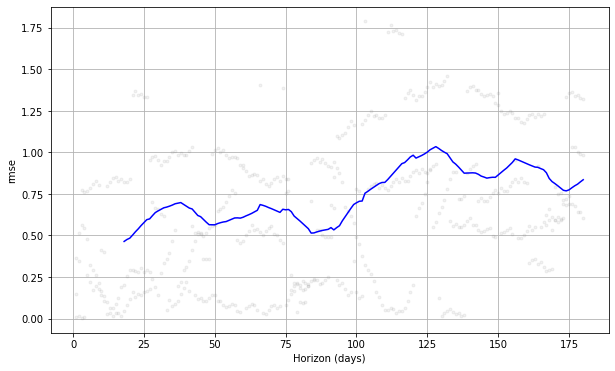

In [194]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Root Mean Squared Error (RMSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "rmse")

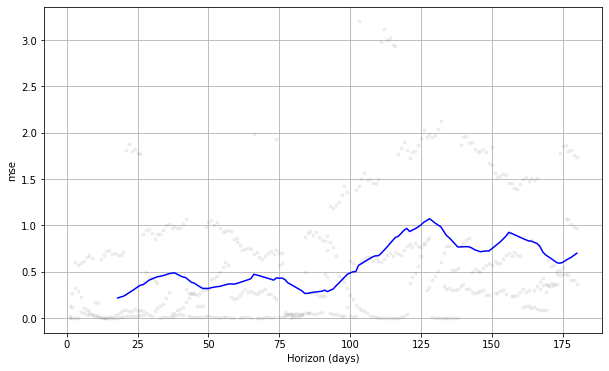

In [195]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Squared Error (MSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mse")

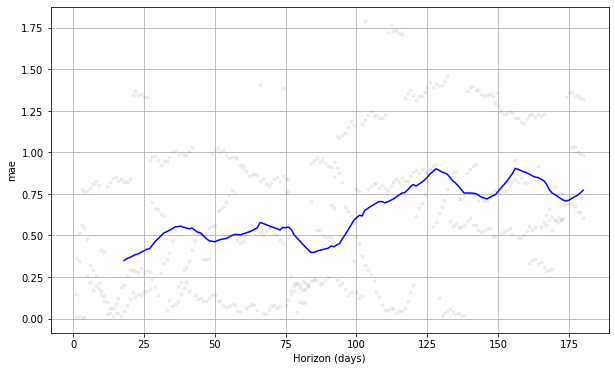

In [196]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Absolute Error (MAE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mae")